In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("/Users/ismail/Desktop/car_price_predict/data/raw/master_data.csv")
data.shape

(20319, 12)

In [68]:
data.sample(10)

,Unnamed: 0,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
3498,2561,GMC,Yukon,2016,"$37,800",White,Used,"SUV, Crossover",4 x 4,Automatic,Other,"192,728"
9812,1143,Toyota,Tacoma,2009,"$17,000",Blue,Used,Pickup Truck,4 x 4,Manual,Gasoline,"280,000"
15372,237,Ford,Ranger,2023,"$49,610",Grey,New,Pickup Truck,4 x 4,Automatic,Gasoline,na
9897,1228,Nissan,Frontier,2023,"$54,777",Grey,New,Pickup Truck,4 x 4,Automatic,Gasoline,na
6563,5626,Volvo,XC90,2017,"$30,999",Blue,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"173,000"
18174,1023,Hyundai,Santa Fe,2017,na,Blue,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"174,121"
8847,178,Chevrolet,Trax,2013,"$12,990",Black,Used,"SUV, Crossover",Front-wheel drive (FWD),Automatic,Gasoline,"135,347"
11319,279,Ford,Edge,2010,"$12,499",Red,Used,"SUV, Crossover",Front-wheel drive (FWD),Automatic,Gasoline,"107,636"
19513,195,Buick,Encore,2019,"$28,995",Blue,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"36,844"
3931,2994,Toyota,Corolla,2010,"$9,200",Red,Used,Sedan,na,Automatic,Gasoline,"159,000"


In [69]:
print("Dataset Columns --------------")
data.columns

Dataset Columns --------------


Index(['Unnamed: 0', 'brand', 'model', 'date', 'price', 'color', 'condition',
       'bodytype', 'wheel_config', 'transmission', 'fueltype', 'mileage'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20319 entries, 0 to 20318
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20319 non-null  int64 
 1   brand         20319 non-null  object
 2   model         20319 non-null  object
 3   date          20319 non-null  object
 4   price         20319 non-null  object
 5   color         20311 non-null  object
 6   condition     20319 non-null  object
 7   bodytype      20319 non-null  object
 8   wheel_config  20312 non-null  object
 9   transmission  20312 non-null  object
 10  fueltype      20312 non-null  object
 11  mileage       20240 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


# Analysis:
1.  A few columns in the dataset are not correctly tagged Dtypes. For instance, The price column should be Float but instead it is tagged as Object
2. From the given data, It can be found that the missing values for a dtype object is denoted by "na". We can make this numpy "Nan" 
3. Also, we can see in the Transimission column, The value is "0", That doesn't make any sense. Hence we will replace with the "Other"

In [71]:
column_clean = ['price','mileage']
def data_cleaning():
    '''
    Removing the unnecessary column names "Unnamed :0" and cleaning the numerical columns Price, date, and mileage and making them float type from Object
    '''
    data.drop("Unnamed: 0", axis = 1,  inplace = True)
    data['date']=data.date.replace('na', np.nan).astype(float)
    for i in column_clean:
        data[i]=data[i].replace('na',np.nan)
        data[i]=data[i].str.replace(',','')
        data[i]=data[i].str.replace('$','')
        data[i]=data[i].astype(float)
    
data_cleaning()


In [72]:
data.sample(10)

,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
1309,Honda,Pilot,2017.00,22500.00,Blue,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,190000.00
19464,Honda,Passport,2019.00,31995.00,Grey,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,141680.00
13148,Ford,Escape,2020.00,28990.00,Black,Used,"SUV, Crossover",Front-wheel drive (FWD),Automatic,Gasoline,27079.00
7387,Ford,Edge,2019.00,24388.00,Silver,Used,"SUV, Crossover",Front-wheel drive (FWD),Automatic,Gasoline,126310.00
6700,Volkswagen,Passat,2015.00,18995.00,Grey,Used,Sedan,Front-wheel drive (FWD),Manual,Gasoline,116774.00
1154,Ford,F-350,2010.00,23500.00,na,Used,Pickup Truck,na,na,na,285000.00
2486,Jaguar,X-TYPE,2007.00,7000.00,Black,Used,Sedan,All-wheel drive (AWD),Automatic,Gasoline,147000.00
6260,Chevrolet,Cruze,2013.00,14000.00,na,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,56000.00
18310,Ram,1500,2022.00,51699.00,Black,New,Pickup Truck,4 x 4,Automatic,Gasoline,NaN
5828,GMC,Other,2009.00,16960.00,White,Used,Pickup Truck,Other,Automatic,Other,224183.00


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20319 entries, 0 to 20318
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         20319 non-null  object 
 1   model         20319 non-null  object 
 2   date          20095 non-null  float64
 3   price         19199 non-null  float64
 4   color         20311 non-null  object 
 5   condition     20319 non-null  object 
 6   bodytype      20319 non-null  object 
 7   wheel_config  20312 non-null  object 
 8   transmission  20312 non-null  object 
 9   fueltype      20312 non-null  object 
 10  mileage       17647 non-null  float64
dtypes: float64(3), object(8)
memory usage: 1.7+ MB


In [74]:
# Finding the numerical and categorical features 
numerical_features = [columns for columns in data.columns if data[columns].dtype !='O']
categorical_features = [features for features in data.columns if features not in numerical_features]
print(numerical_features)
print(categorical_features)

['date', 'price', 'mileage']
['brand', 'model', 'color', 'condition', 'bodytype', 'wheel_config', 'transmission', 'fueltype']


In [75]:
def replace_na(value):
    if value == 'na':
        return np.nan
    else:
        return value

def replace_value(value):
    if value == '0':
        return "Other"
    
    else:
        return value

for feature in categorical_features:
    if feature == 'transmission':
        data[feature] = data[feature].apply(replace_value)
    data[feature] = data[feature].apply(replace_na)

data.sample(10)



,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
16006,Chevrolet,Equinox,2017.00,18995.00,Other,Used,"SUV, Crossover",Front-wheel drive (FWD),Automatic,Gasoline,117464.00
3945,Toyota,Sienna,2014.00,22995.00,Black,Used,Other,Front-wheel drive (FWD),Automatic,Gasoline,153000.00
13430,Buick,Encore,2016.00,18500.00,Brown,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,80400.00
16826,Chevrolet,Camaro,2018.00,50599.00,Red,Used,Sedan,Rear-wheel drive (RWD),Automatic,Gasoline,33999.00
3164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12798,Toyota,Tacoma,2022.00,51600.00,White,Used,Pickup Truck,4 x 4,Automatic,Gasoline,15212.00
16219,Chevrolet,Camaro,2018.00,50599.00,Red,Used,Sedan,Rear-wheel drive (RWD),Automatic,Gasoline,33999.00
17230,Kia,Soul,2020.00,23948.00,Black,Used,Wagon,Front-wheel drive (FWD),Automatic,Gasoline,86232.00
8828,GMC,Sierra 3500,2023.00,109251.00,Black,New,Pickup Truck,4 x 4,Automatic,Diesel,NaN
7661,Chevrolet,Equinox,2018.00,17990.00,Silver,Used,"SUV, Crossover",Front-wheel drive (FWD),Automatic,Gasoline,151618.00


In [76]:
data.transmission.value_counts()

transmission
Automatic    17005
Manual         954
Other           83
Name: count, dtype: int64

# Final data.
1. The data is ready for data science operations and to develop a model.


In [184]:
data.to_csv("DS_ready.csv")

In [188]:
ds_data = data.copy()
ds_data

,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
0,Nissan,Rogue,2018.00,25490.00,Other,Used,"SUV, Crossover",All-wheel drive (AWD),NaN,Gasoline,NaN
1,Jeep,Wrangler,2021.00,49495.00,Silver,Used,Convertible,4 x 4,Automatic,Gasoline,60463.00
2,BMW,X5,2016.00,29995.00,White,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Other,156274.00
3,Ram,1500,2023.00,51755.00,Red,New,Pickup Truck,Other,Automatic,Gasoline,NaN
4,Dodge,Power Ram 2500,2004.00,22500.00,NaN,Used,Pickup Truck,NaN,NaN,NaN,342500.00
...,...,...,...,...,...,...,...,...,...,...,...
20314,Ford,Escape,2019.00,23995.00,Grey,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,128221.00
20315,Subaru,Forester,2004.00,7500.00,Silver,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,215000.00
20316,Buick,Verano,2014.00,7000.00,Black,Used,Sedan,NaN,NaN,NaN,195000.00
20317,Suzuki,Grand Vitara,2006.00,400.00,NaN,Used,"SUV, Crossover",NaN,NaN,NaN,200005.00


In [189]:
pd.set_option('display.float_format', '{:.2f}'.format)
ds_data.describe()

,date,price,mileage
count,20095.00,19199.00,17647.00
mean,2016.74,33737.27,115338.38
std,5.84,32934.47,118454.40
min,1900.00,1.00,0.00
25%,2014.00,16988.00,53653.00
50%,2018.00,27995.00,97815.00
75%,2021.00,43497.50,160000.00
max,2024.00,2049900.00,6669042.00


# Analysis
1. We can clearly see that there are outliers in the data. For instance, The Minimum price is 1 and max price is 2 Million.

In [187]:
# Checking the Missing Values in the data
print(ds_data.shape)
ds_data.isna().all(axis = 1).sum()


(20319, 11)


np.int64(219)

In [190]:
ds_data.isna().sum()

brand            224
model            241
date             224
price           1120
color           1716
condition        224
bodytype         224
wheel_config    1933
transmission    2277
fueltype        1670
mileage         2672
dtype: int64

In [183]:
ds_data[ds_data.isna().any(axis=1)]

ds_data[ds_data['price'].isnull()]

,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
17,Lincoln,Corsair,2021.00,NaN,Grey,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,14856.00
19,Hyundai,Santa Fe,2018.00,NaN,White,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Other,72630.00
36,Chevrolet,Traverse,2011.00,NaN,Blue,Used,Other,Front-wheel drive (FWD),Automatic,Other,160384.00
49,GMC,C/K 1500,1993.00,NaN,NaN,Used,Pickup Truck,NaN,NaN,NaN,299.00
57,Ford,F-150,2002.00,NaN,White,Used,Pickup Truck,4 x 4,Automatic,Gasoline,231450.00
...,...,...,...,...,...,...,...,...,...,...,...
20218,Ford,Ranger,1992.00,NaN,NaN,Used,Pickup Truck,Rear-wheel drive (RWD),Automatic,Gasoline,270.00
20231,GMC,Savana,2000.00,NaN,NaN,Used,"Minivan, Van",Rear-wheel drive (RWD),Automatic,NaN,1234.00
20245,Chevrolet,C/K Pickup 2500,2006.00,NaN,NaN,Used,Pickup Truck,NaN,NaN,NaN,123456.00
20249,Chrysler,300-Series,2010.00,NaN,Black,Used,Sedan,Rear-wheel drive (RWD),Automatic,NaN,155000.00


In [163]:
ds_data.dropna(how = 'all', inplace = True)

In [173]:
# Since we have 20k records and the missing values are at max of 2k. If we remove the all the missing values, we still have 18k records to play with.
# Lets us check the missing value records. 
#ds_data.replace(r'^\s*$', np.nan, regex=True, inplace=True)

ds_data.isna().all(axis = 0).sum()

np.int64(0)

In [81]:
# since, Most of the records are fully missing, we can drop the duplicates....
ds_data.dropna(inplace = True)
print(ds_data.isna().sum())

brand           0
model           0
date            0
price           0
color           0
condition       0
bodytype        0
wheel_config    0
transmission    0
fueltype        0
mileage         0
dtype: int64


In [ ]:
# lets check for any duplicate records

print("Duplicates before: ", ds_data.duplicated().sum())  # This gave the o/p as 3662, It will be safe to drop those duplicates.
ds_data.drop_duplicates(inplace= True)
print("Duplicates after: ", ds_data.duplicated().sum())




Duplicates before:  3662
Duplicates after:  0


In [83]:
ds_data.shape

(10823, 11)

In [84]:
ds_data.sample(10)

,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
16960,Volkswagen,Jetta,2019.00,20995.00,White,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,114974.00
18187,Chevrolet,Malibu,2020.00,26888.00,Black,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,52236.00
4323,Dodge,Challenger,2011.00,37777.00,Green,Used,Coupe (2 door),Rear-wheel drive (RWD),Automatic,Gasoline,128000.00
96,Acura,ILX,2019.00,28595.00,White,Used,Other,Other,Other,Other,52747.00
12354,Nissan,Sentra,2017.00,16200.00,Black,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,104292.00
9236,Ford,Mustang,2019.00,34995.00,Black,Used,Coupe (2 door),Rear-wheel drive (RWD),Automatic,Gasoline,47300.00
10529,Ford,EcoSport,2019.00,21495.00,Grey,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,121794.00
11329,Nissan,Pathfinder,2016.00,23786.00,White,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,73395.00
4572,Hyundai,Elantra,2014.00,7990.00,Grey,Used,Hatchback,Front-wheel drive (FWD),Automatic,Other,203444.00
10251,Honda,Civic,2018.00,28988.00,Red,Used,Hatchback,Front-wheel drive (FWD),Automatic,Gasoline,67827.00


In [91]:
print(categorical_features)

['brand', 'model', 'color', 'condition', 'bodytype', 'wheel_config', 'transmission', 'fueltype']


color
White        2702
Black        2543
Grey         1794
Blue         1078
Silver        978
Red           813
Other         439
Brown         112
Green         105
Orange         73
Gold           53
Beige          49
Yellow         33
Purple         20
Burgundy       15
Off-White      11
Tan             4
Teal            1
Name: count, dtype: int64


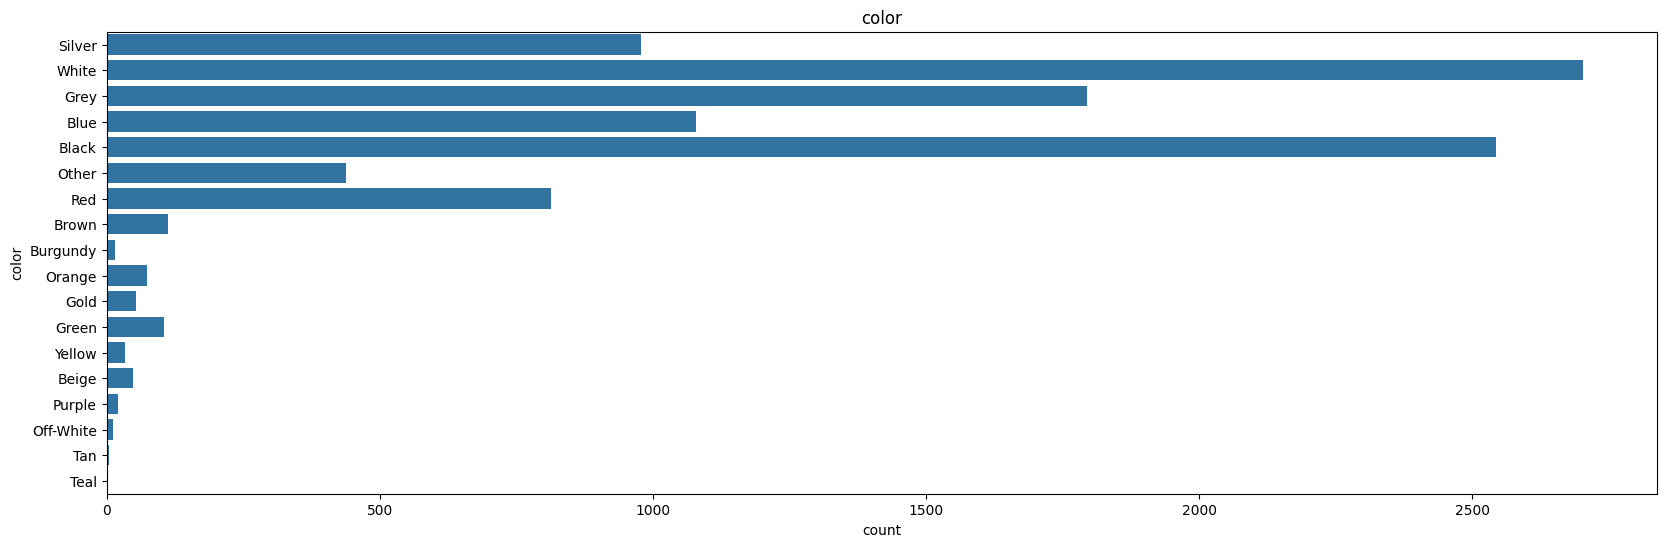

condition
Used              10812
Damaged               6
Lease Takeover        4
New                   1
Name: count, dtype: int64


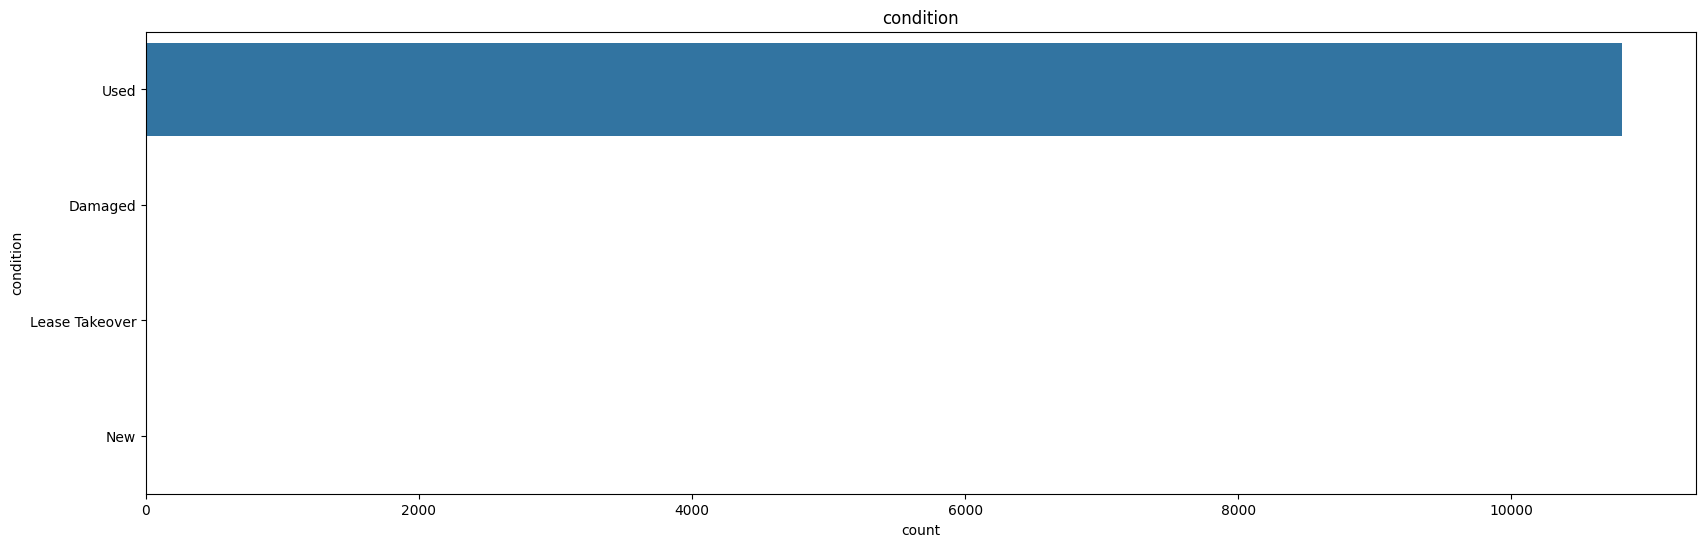

bodytype
SUV, Crossover    4424
Sedan             2798
Pickup Truck      1008
Other              714
Minivan, Van       558
Hatchback          527
Coupe (2 door)     371
Wagon              234
Convertible        189
Name: count, dtype: int64


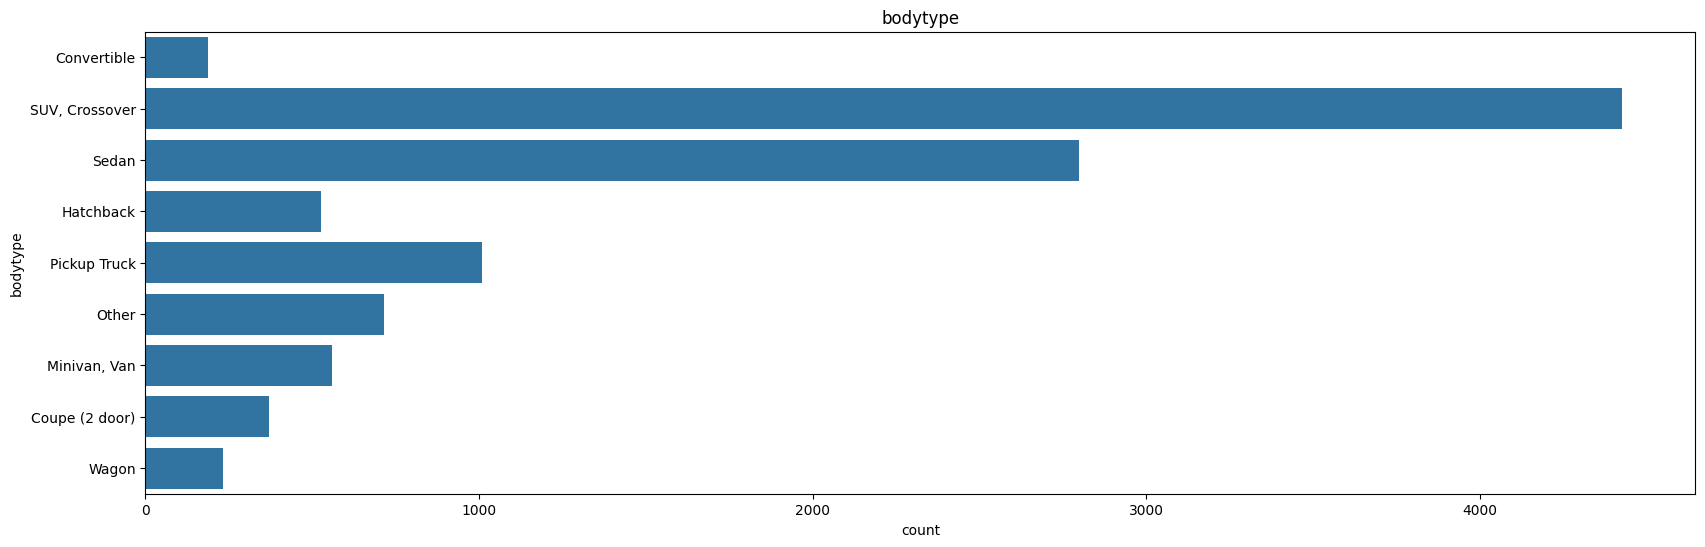

wheel_config
All-wheel drive (AWD)      3837
Front-wheel drive (FWD)    3641
4 x 4                      1905
Rear-wheel drive (RWD)      864
Other                       576
Name: count, dtype: int64


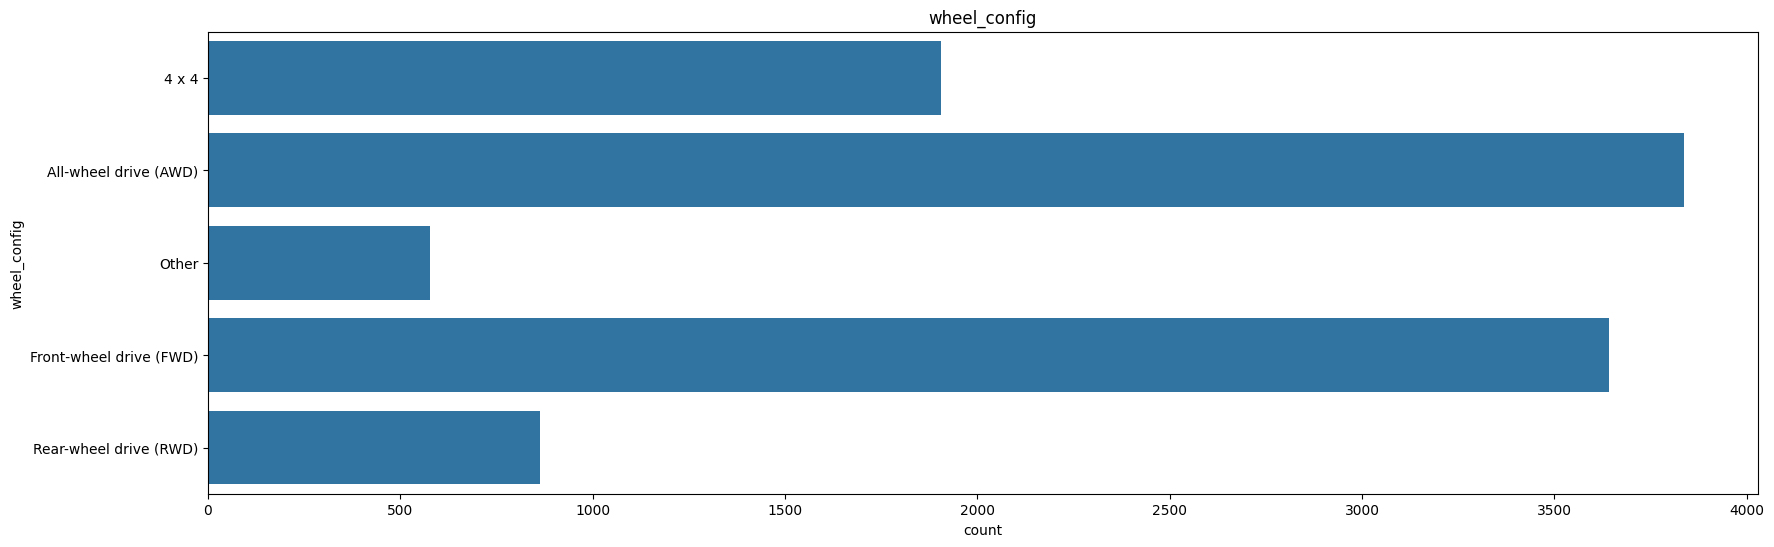

transmission
Automatic    10141
Manual         630
Other           52
Name: count, dtype: int64


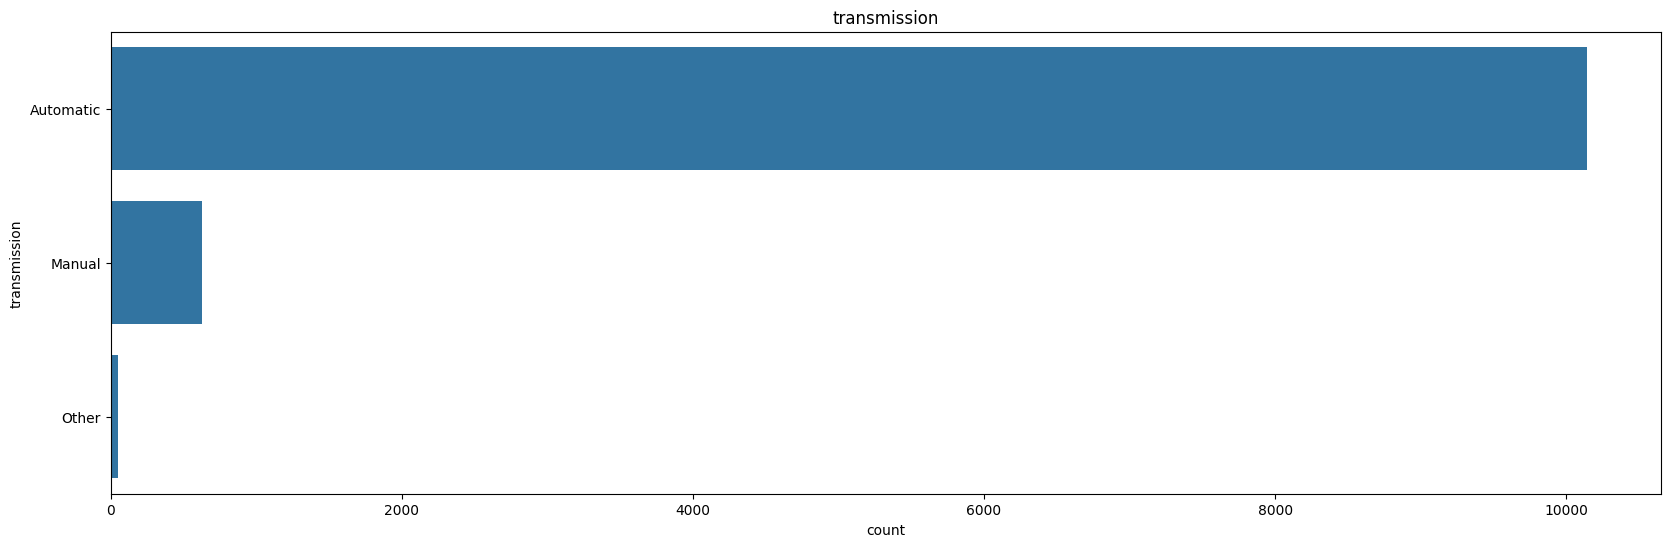

fueltype
Gasoline           7842
Other              2130
Diesel              407
Hybrid-Electric     302
Electric            142
Name: count, dtype: int64


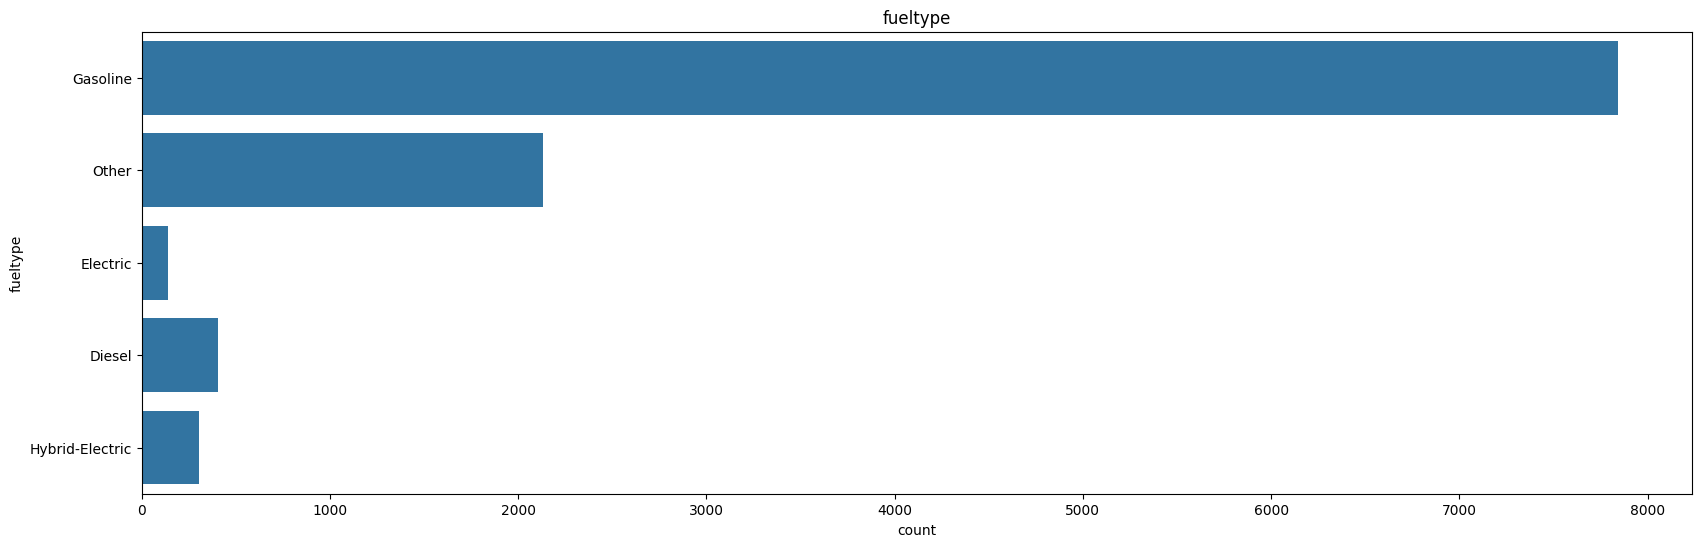

In [93]:
# Lets analyse the data. How many different type of data is available. for instance, In condition, is the data equally distributed ?

# Plot Unique value count of categrical features
for feature in categorical_features:
    features=['brand','model']
    if feature not in features:
        print(ds_data[feature].value_counts())
        plt.figure(figsize=(20,6))
        sns.countplot(ds_data[feature])
        plt.title(feature)
        plt.show()

# Analysis of categorical variables...
given the data the condition column is highly imbalanced, we can simply remove the New and others and perform the operation only with USED.
The Color column -> The values are highly imbalanced, we can merge the values of the lesser data with "Others"
The Other columns values are almost equally distributed. 

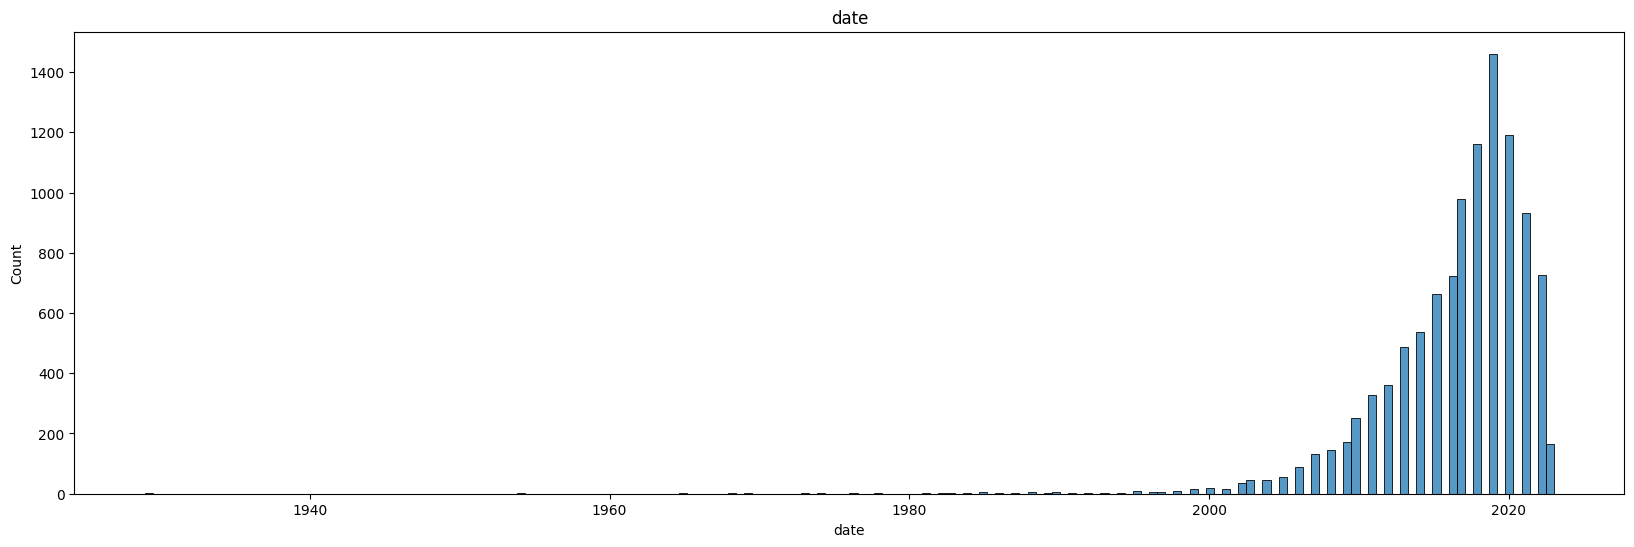

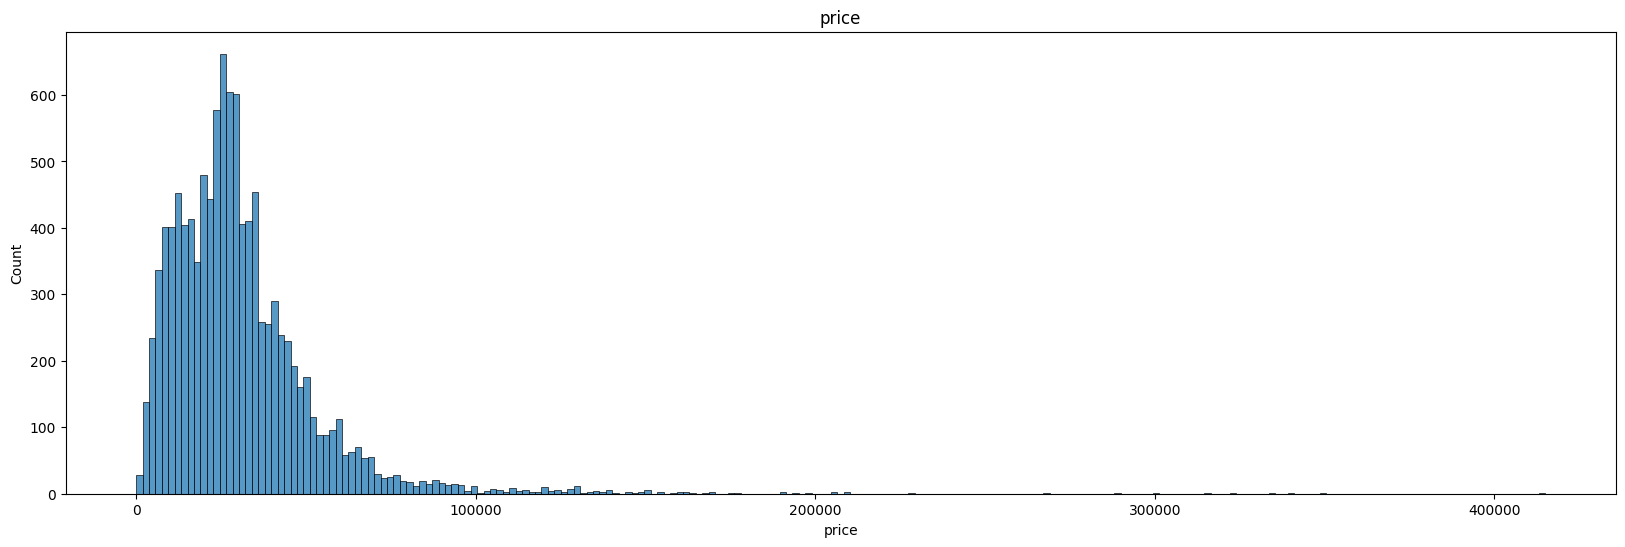

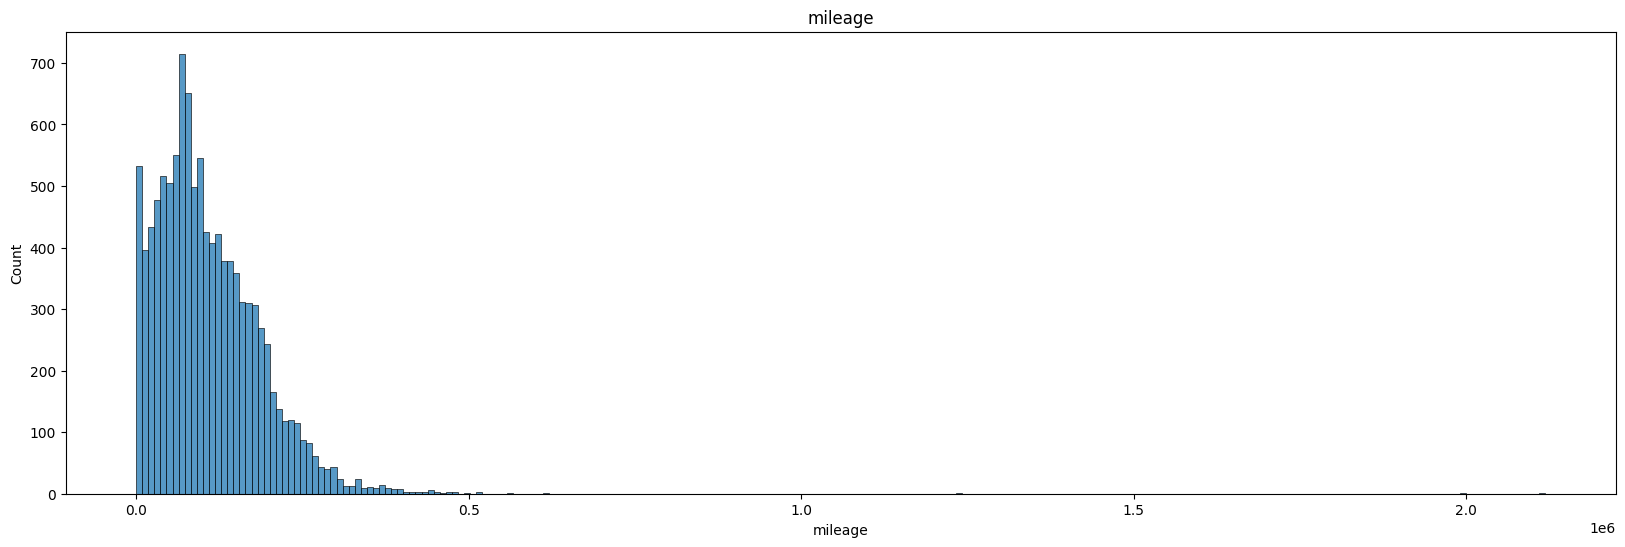

In [95]:
#Univariate Analysis of numerical features,
numerical_features

for feature in numerical_features:
    plt.figure(figsize=(20,6))
    sns.histplot(ds_data[feature])
    plt.title(feature)
    plt.show()
    
    

we can clearly see that the numerical features are skewed either left or right. This indicates that there are outliers in the data.


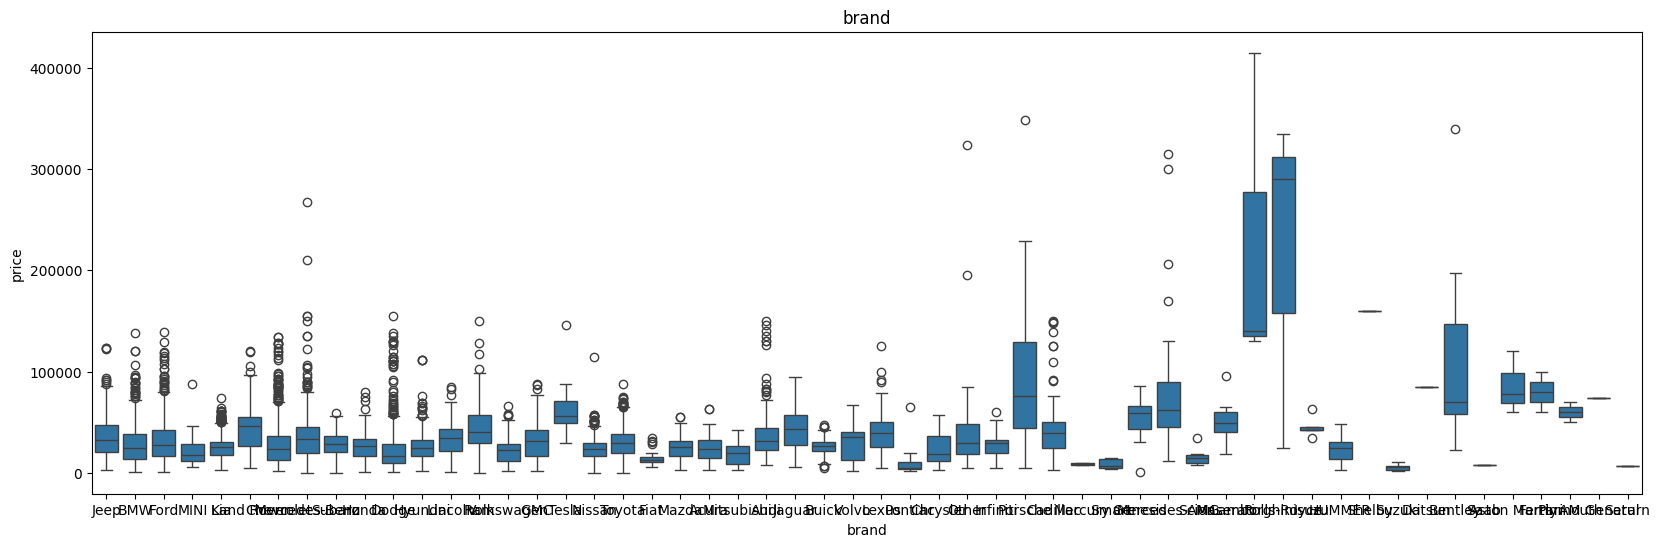

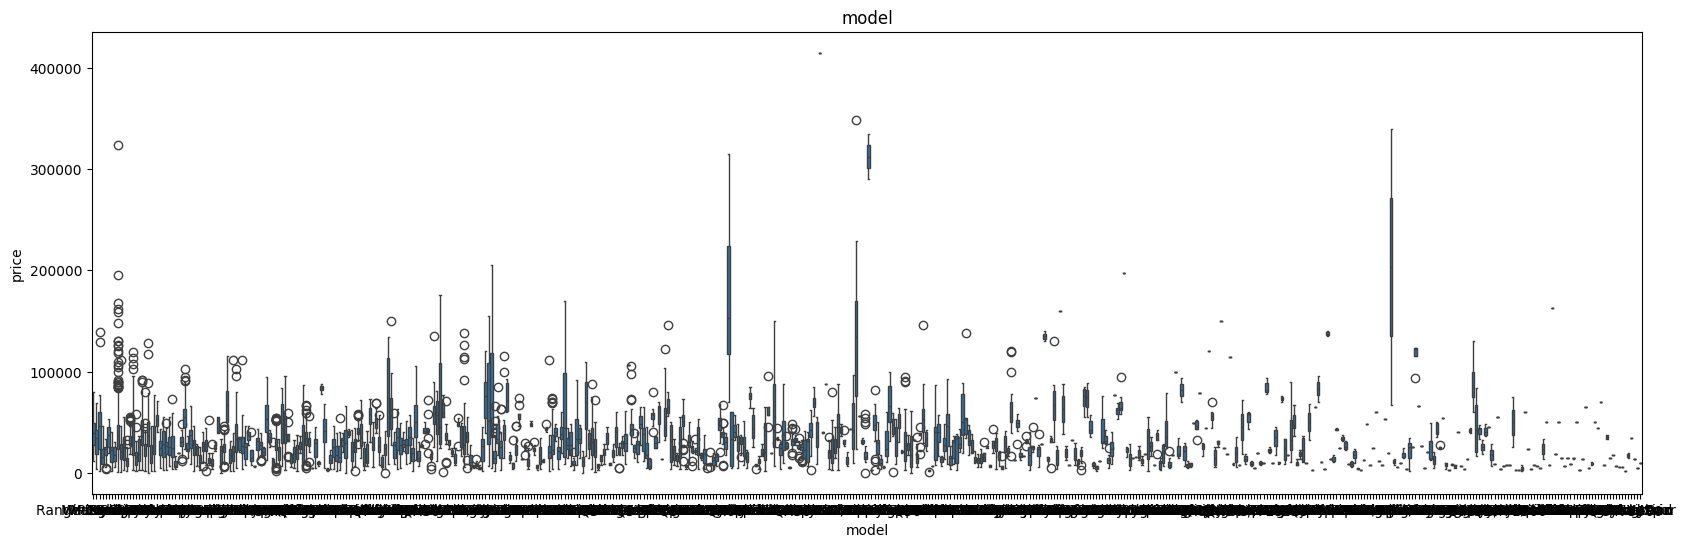

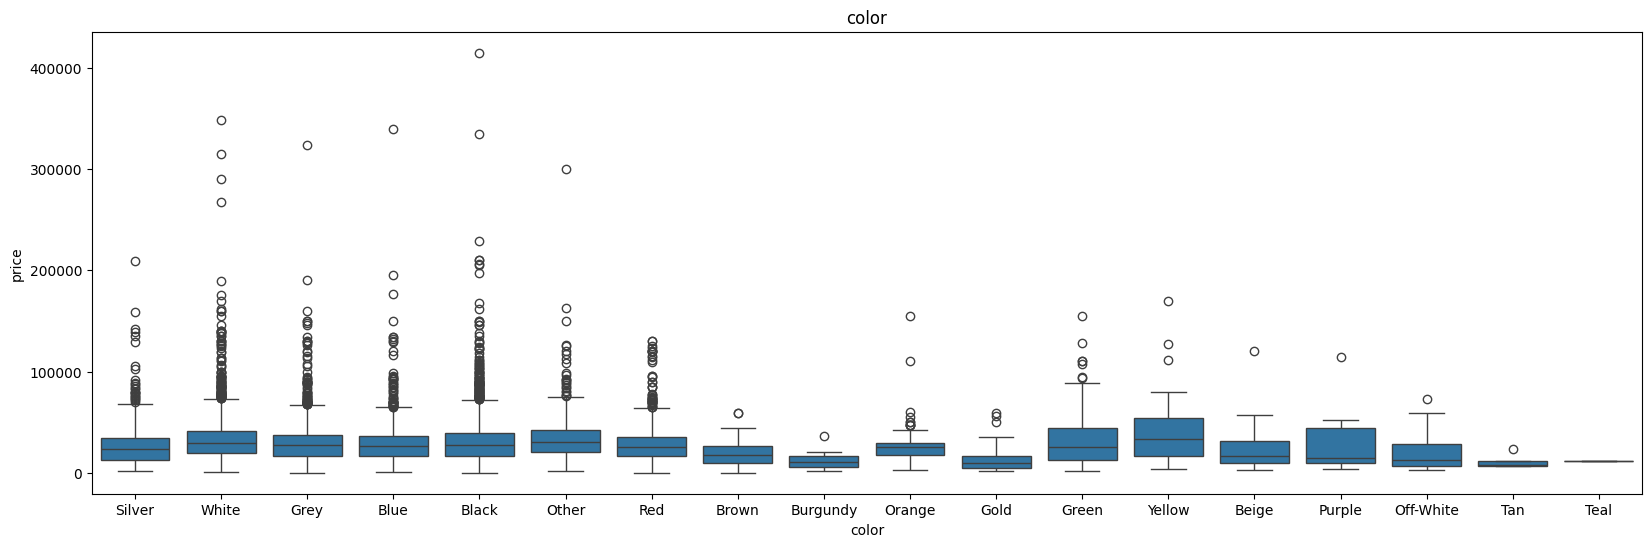

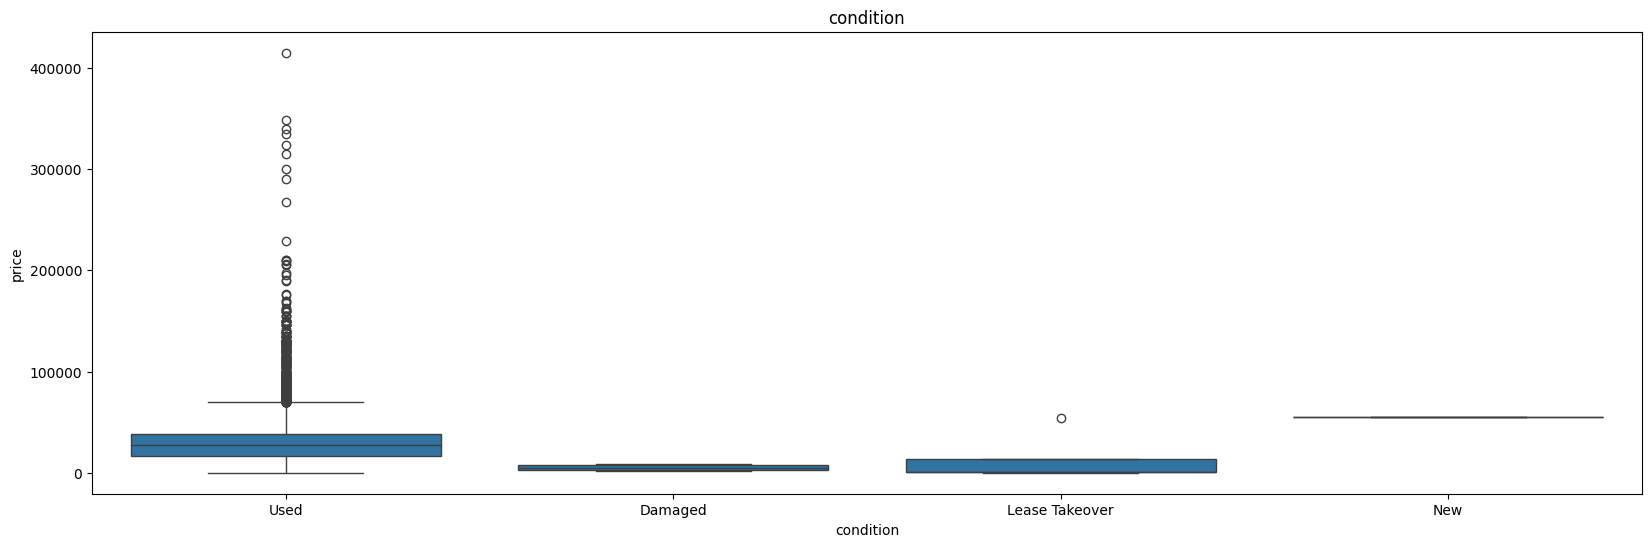

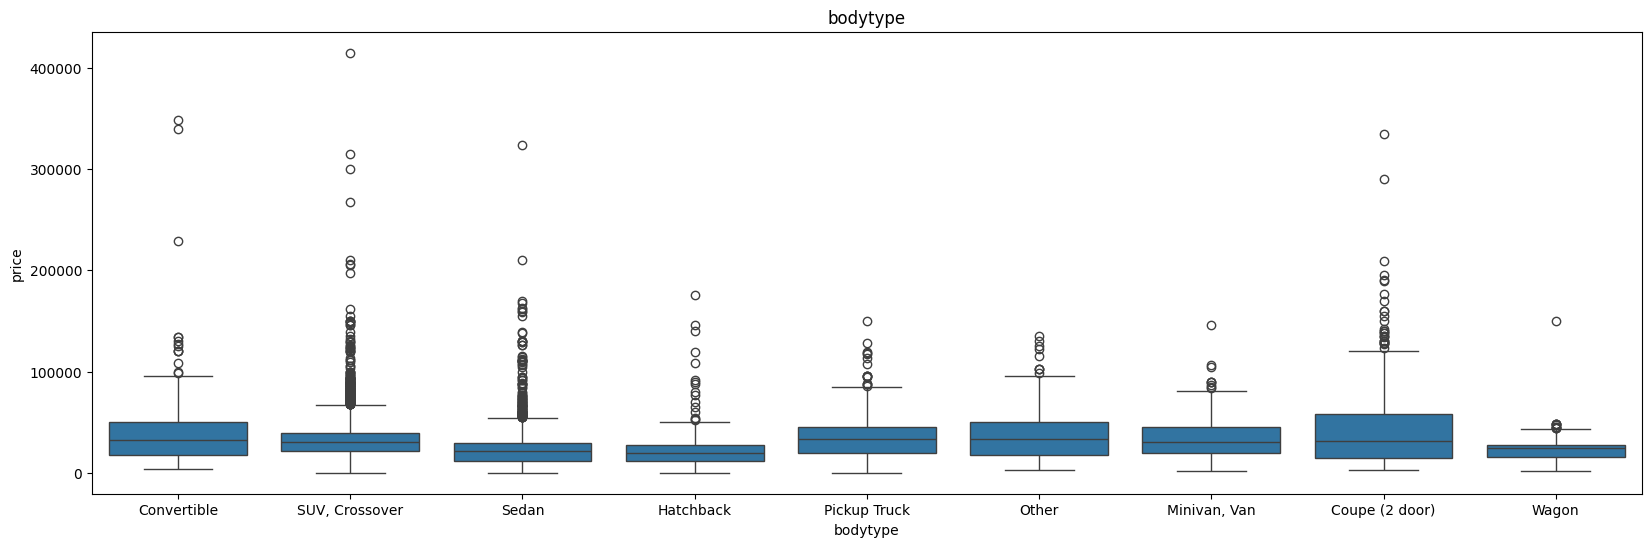

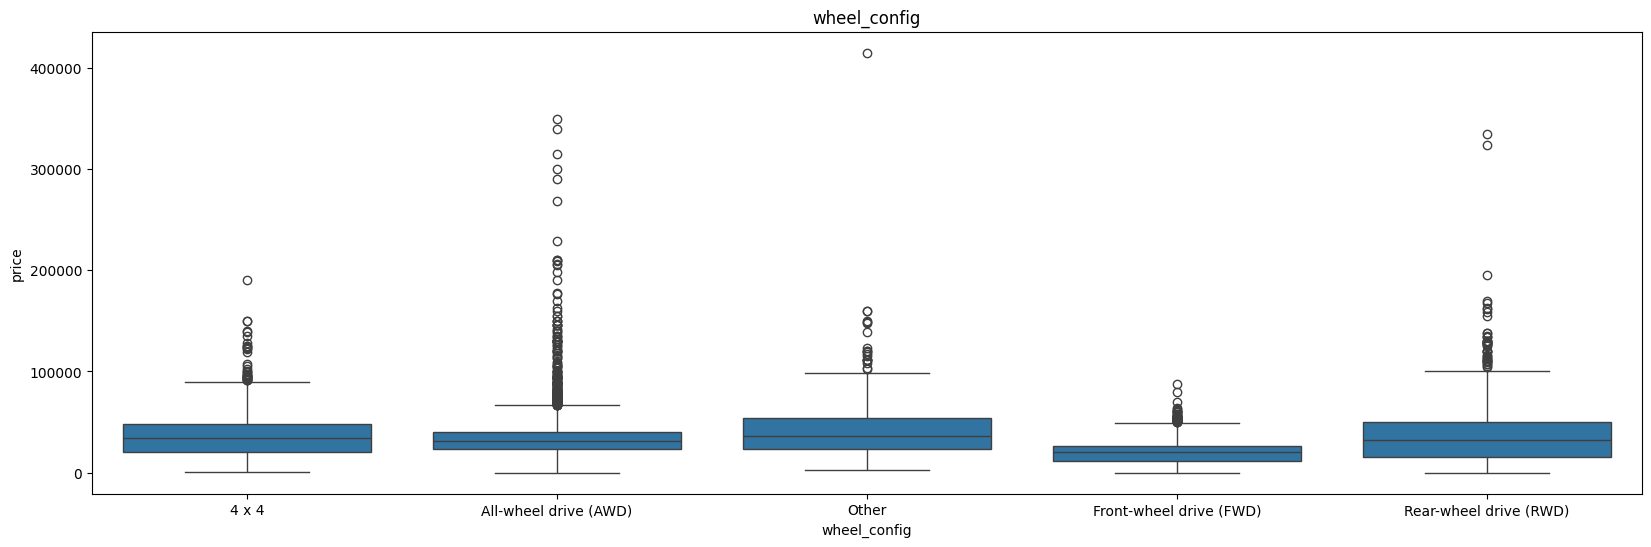

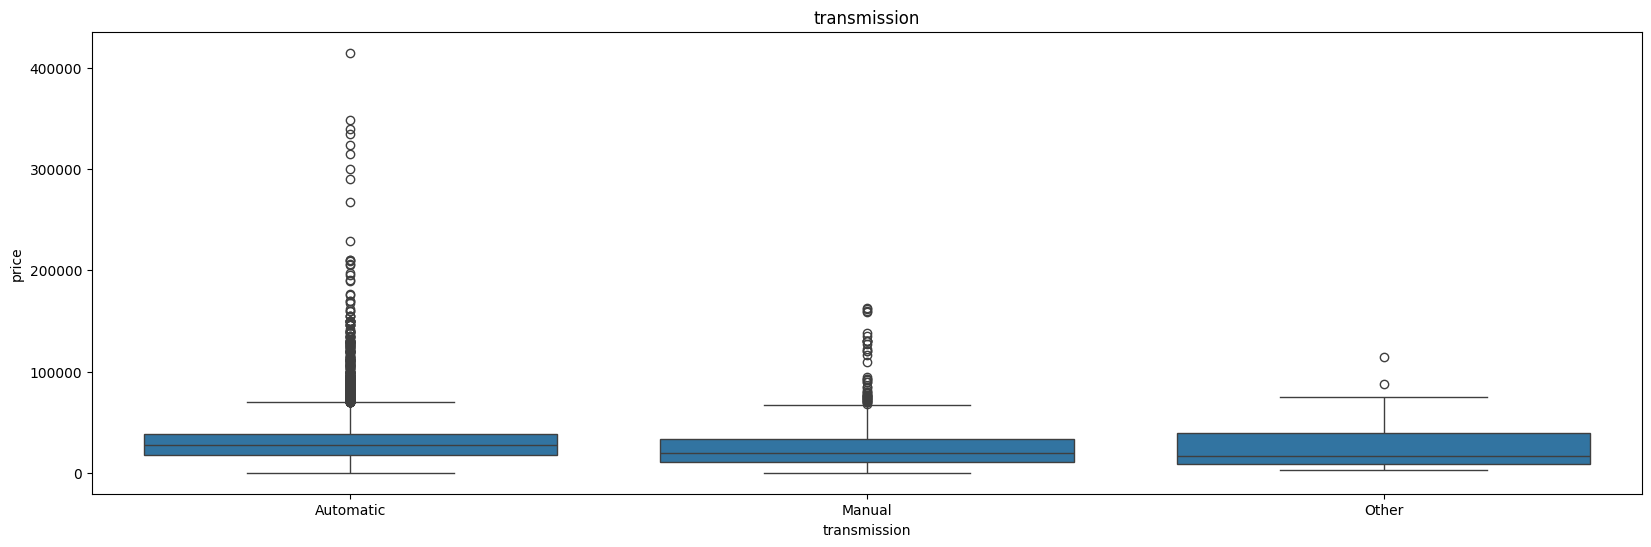

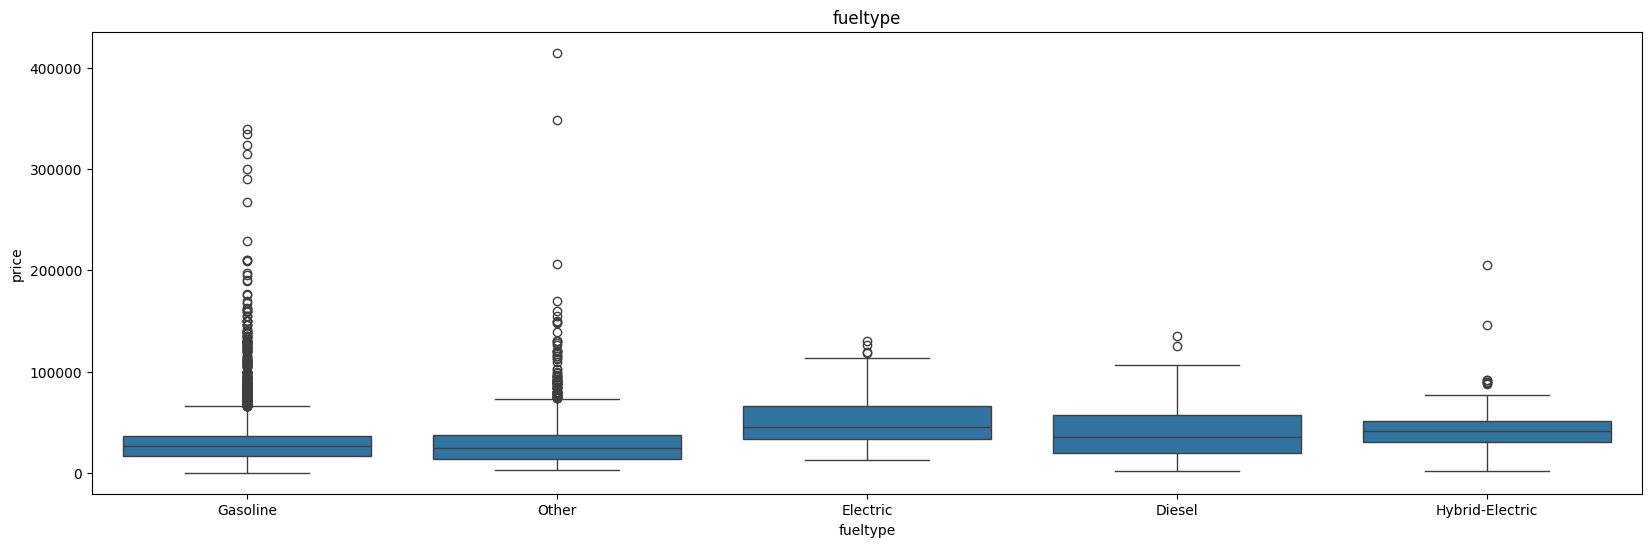

In [97]:
# Lets do analysis of the categorical features with respect to the price column..

for feature in categorical_features:
    plt.figure(figsize=(20,6))
    sns.boxplot(x=feature, y='price', data=ds_data)
    plt.title(feature)
    plt.show()

<Axes: >

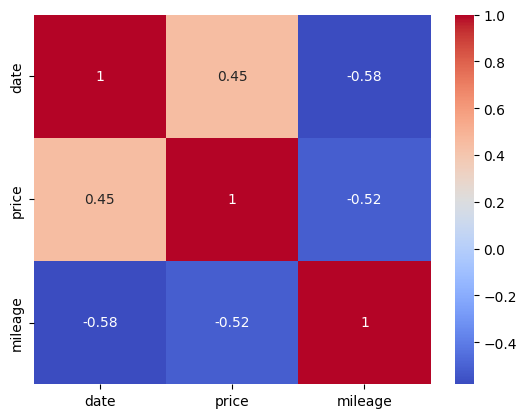

In [100]:
num_data = ds_data[numerical_features]
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')


In [101]:
def outlier_removal(data,column):
    print(column)
    q1  = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR = q3-q1
    lower_whisker= q1 - 1.5*IQR
    upper_whisker = q3 + 1.5*IQR
    #data = data[(data[column] > lower_whisker) & (data[column] < upper_whisker)]
    data[column] = np.where(data[column]<lower_whisker,lower_whisker,data[column])
    data[column] = np.where(data[column]>upper_whisker,upper_whisker,data[column])
    print(upper_whisker)
    print(lower_whisker)
    print(data.shape)
    
    return data

for i in numerical_features:
    if i != 'price':
        new_df= outlier_removal(ds_data,i)

new_df

date
2029.0
2005.0
(10823, 11)
mileage
304979.25
-99598.75
(10823, 11)


,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
1,Jeep,Wrangler,2021.00,49495.00,Silver,Used,Convertible,4 x 4,Automatic,Gasoline,60463.00
2,BMW,X5,2016.00,29995.00,White,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Other,156274.00
5,Ford,Mustang,2021.00,72653.00,Grey,Used,Sedan,Other,Manual,Gasoline,2681.00
9,MINI,Mini Cooper,2009.00,7000.00,Blue,Used,Hatchback,Front-wheel drive (FWD),Manual,Gasoline,127000.00
10,Kia,Forte,2018.00,18998.00,Blue,Used,Sedan,Other,Automatic,Other,63000.00
...,...,...,...,...,...,...,...,...,...,...,...
20306,Ford,F-150,2022.00,62000.00,Black,Used,Pickup Truck,4 x 4,Automatic,Gasoline,17500.00
20307,Ram,1500,2015.00,31000.00,Grey,Used,Pickup Truck,4 x 4,Automatic,Gasoline,144000.00
20308,Chevrolet,Equinox,2019.00,30985.00,Silver,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,53237.00
20311,Hyundai,Sonata,2019.00,27995.00,Blue,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,70125.00


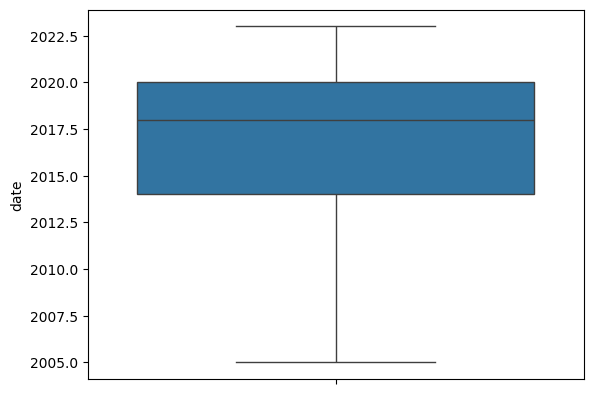

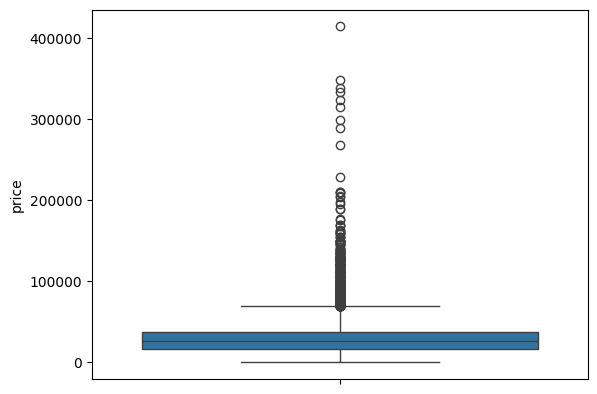

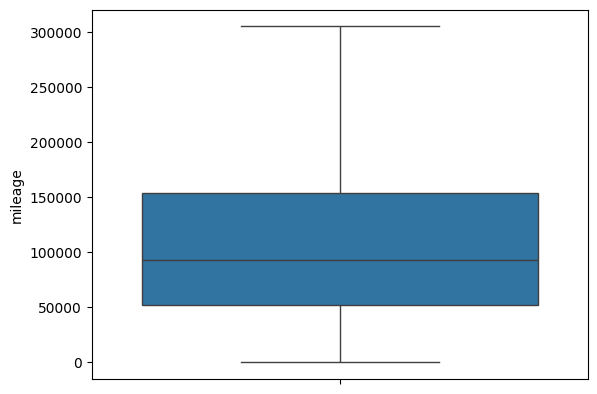

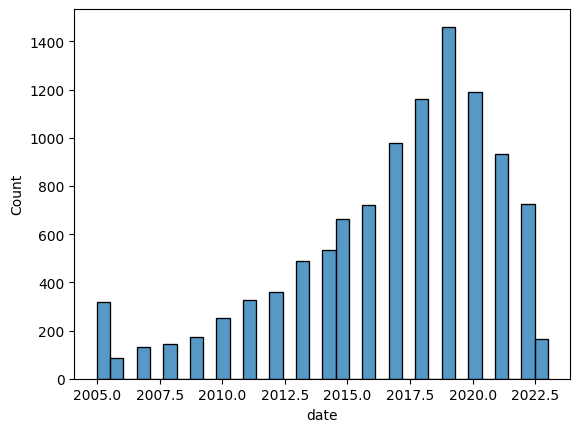

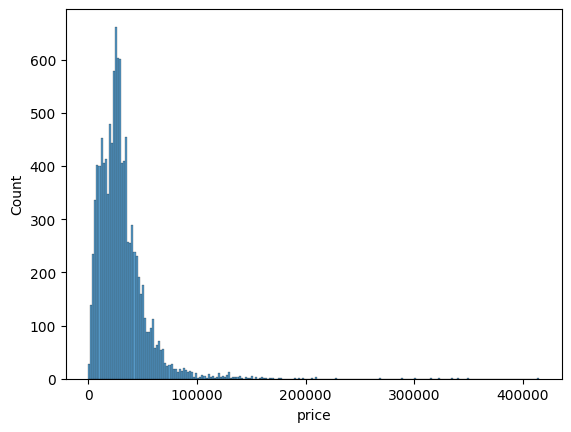

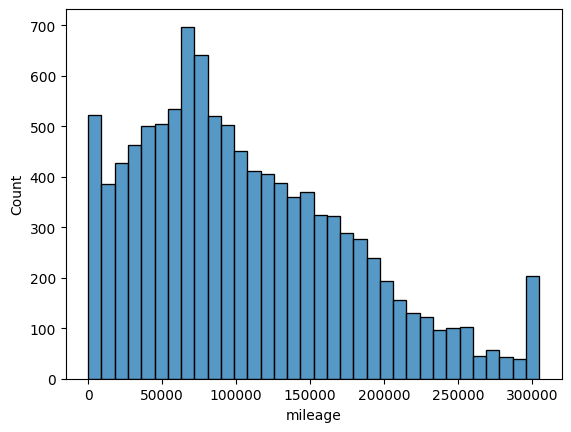

In [102]:
# Box plot after outlier 
for features in numerical_features:
    sns.boxplot(new_df[features])    
    plt.show()
for features in numerical_features:
    sns.histplot(new_df[features])    
    plt.show()

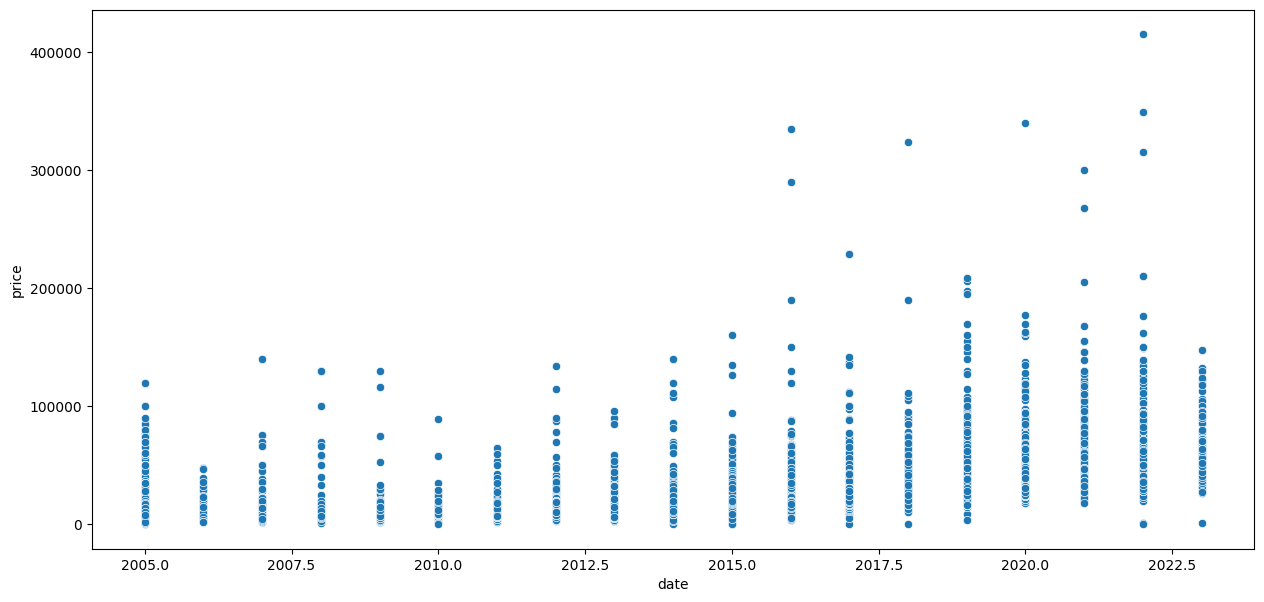

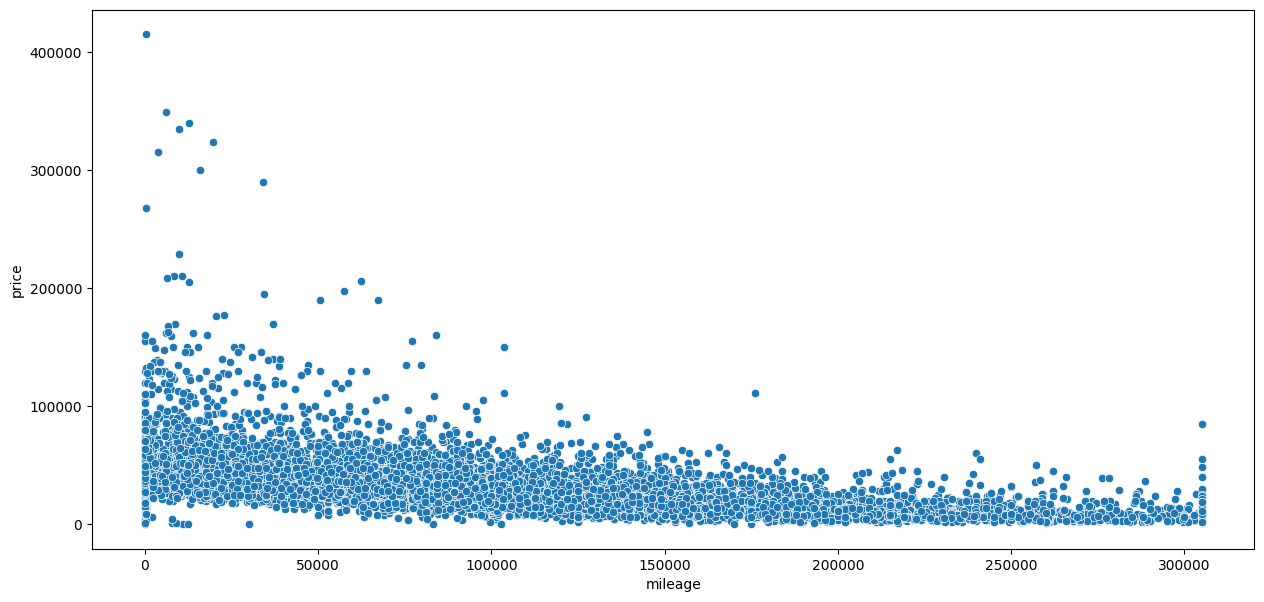

In [107]:
def scatter_plots():
    for feature in numerical_features:
        if feature != 'price':
            plt.figure(figsize=(15,7))
            sns.scatterplot(x = feature, y = 'price', data = ds_data)
            plt.show()

scatter_plots()


In [111]:
ds_data.describe()

,date,price,mileage
count,10823.00,10823.00,10823.00
mean,2016.64,30593.27,107046.84
std,4.27,22579.53,71895.24
min,2005.00,1.00,0.00
25%,2014.00,16988.00,52118.00
50%,2018.00,26900.00,93233.00
75%,2020.00,38000.00,153262.50
max,2023.00,414999.00,304979.25


In [112]:
ds_data.condition.value_counts()

condition
Used              10812
Damaged               6
Lease Takeover        4
New                   1
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

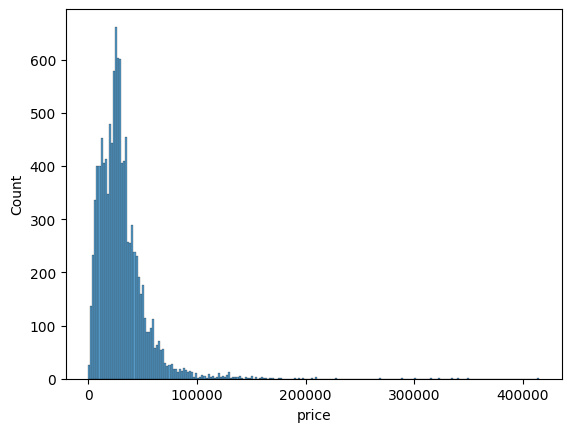

In [119]:
sns.histplot(ds_data[ds_data['condition'] == 'Used']['price'])

In [130]:
ds_data[(ds_data['condition'] == 'Used') & (ds_data['price'] < 2000)]

,brand,model,date,price,color,condition,bodytype,wheel_config,transmission,fueltype,mileage
250,Volvo,XC70,2005.00,1600.00,Silver,Used,Wagon,Front-wheel drive (FWD),Automatic,Gasoline,304979.25
764,GMC,Sierra 1500,2005.00,1500.00,Burgundy,Used,Pickup Truck,4 x 4,Automatic,Gasoline,304979.25
991,Nissan,Murano,2005.00,1800.00,Grey,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,233000.00
1742,Nissan,Versa,2015.00,170.00,Black,Used,Hatchback,Front-wheel drive (FWD),Automatic,Gasoline,102752.00
1766,Subaru,Impreza,2017.00,170.00,Grey,Used,Hatchback,All-wheel drive (AWD),Automatic,Gasoline,83301.00
5182,Toyota,Venza,2014.00,17.00,Black,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,175000.00
6223,Toyota,Corolla,2015.00,14.00,Brown,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,127.00
6893,Honda,Other,2005.00,800.00,Blue,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,304979.25
7588,Genesis,G70,2023.00,1117.00,White,Used,Sedan,All-wheel drive (AWD),Automatic,Gasoline,9000.00
8421,Hyundai,Sonata,2007.00,1888.00,Black,Used,Sedan,Front-wheel drive (FWD),Automatic,Gasoline,288914.00
